In [1]:
import pandas as pd
import numpy as np

loc = "MERGED2016_17_PP.csv"

dfraw = pd.read_csv(loc)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (676,1725) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dfraw.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_4_LOANNOPELL,C150_L4_LOANNOPELL,D150_L4_LOANNOPELL,C150_4_NOLOANNOPELL,D150_4_NOLOANNOPELL,C150_L4_NOLOANNOPELL,D150_L4_NOLOANNOPELL,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,195.0,NaN,NaN,0.3258,89.0,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,229.0,NaN,NaN,0.5603,630.0,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,0.5000,2.0,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,135.0,NaN,NaN,0.5606,264.0,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,55.0,NaN,NaN,0.2277,101.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfraw.shape

### There are a ridiculous number of columns here, so lets grab some interesting variables and put them in their own dataframe

In [3]:
df = dfraw[["C100_4", "NPT4_PUB"]]
df.columns = ["completion", "public_school_tuition"]

In [4]:
df.head()

,completion,public_school_tuition
0,0.0643,15567.0
1,0.3018,16475.0
2,0.1429,NaN
3,0.1533,19423.0
4,0.0725,15037.0


In [52]:
df.corr()

,completion,public_school_tuition
completion,1.000000,0.514966
public_school_tuition,0.514966,1.000000


### Joy suggested that INEXPFTE (instructional expenditures per full-time student) and ADM_RATE (admissions rate) are correlated with completion rates, so lets add those to the dataframe and run the correlation

In [5]:
df["expenditures_per_student"] = dfraw["INEXPFTE"]
df["adm_rate"] = dfraw["ADM_RATE"]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### I suggest looking at pell_grant_rate, and loan_principal. The intuition is that if you qualify for pell you're from a disadvantaged background and less likely to graduate

In [6]:
df["pell_grant_rate"]=dfraw["PCTPELL"]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df.head()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate
0,0.0643,15567.0,5888.0,0.8738,0.7039
1,0.3018,16475.0,17055.0,0.5814,0.3525
2,0.1429,NaN,5417.0,NaN,0.6971
3,0.1533,19423.0,10558.0,0.7628,0.2949
4,0.0725,15037.0,7889.0,0.4590,0.7815


### Another place to look for impact on completion rates is the share of degree seeking students who are of a particular race or ethnicity

In [8]:
df["white"] = dfraw["UGDS_WHITE"]
df["black"] = dfraw["UGDS_BLACK"]
df["hispanic"] = dfraw["UGDS_HISP"]
df["asian"] = dfraw["UGDS_ASIAN"]
df["american_indian"] = dfraw["UGDS_AIAN"]
df["hawaiian_pcislander"] = dfraw["UGDS_NHPI"]
df["race_ethnicity_two"] =dfraw["UGDS_2MOR"]
df["nonresident"] = dfraw["UGDS_NRA"]
df["unknown"] = dfraw["UGDS_UNKN"]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [9]:
df.corr()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate,white,black,hispanic,asian,american_indian,hawaiian_pcislander,race_ethnicity_two,nonresident,unknown
completion,1.000000,0.514966,0.451118,-0.297737,-0.565470,0.164717,-0.321876,-0.016740,0.260182,-0.043332,-0.094701,0.112000,0.200733,-0.069741
public_school_tuition,0.514966,1.000000,0.418070,0.067616,-0.123374,0.190650,-0.039623,-0.231186,0.017355,-0.092880,-0.071426,0.004581,0.219540,0.022197
expenditures_per_student,0.451118,0.418070,1.000000,-0.384643,-0.320723,0.037661,-0.151433,-0.095913,0.248910,-0.001747,-0.040525,0.102924,0.242489,0.011870
adm_rate,-0.297737,0.067616,-0.384643,1.000000,0.118348,0.245675,-0.116834,-0.057294,-0.287732,0.059356,0.013785,-0.076833,-0.185066,-0.013716
pell_grant_rate,-0.565470,-0.123374,-0.320723,0.118348,1.000000,-0.282333,0.475038,0.052887,-0.206219,0.073972,0.056482,-0.125874,-0.291917,-0.012612
white,0.164717,0.190650,0.037661,0.245675,-0.282333,1.000000,-0.539524,-0.542132,-0.325517,-0.160988,-0.133356,-0.093288,-0.150679,-0.193684
black,-0.321876,-0.039623,-0.151433,-0.116834,0.475038,-0.539524,1.000000,-0.139516,-0.148389,-0.091492,-0.032346,-0.127097,-0.131092,-0.034165
hispanic,-0.016740,-0.231186,-0.095913,-0.057294,0.052887,-0.542132,-0.139516,1.000000,0.181407,-0.047228,0.059547,0.006731,-0.033324,-0.030911
asian,0.260182,0.017355,0.248910,-0.287732,-0.206219,-0.325517,-0.148389,0.181407,1.000000,-0.069042,0.187013,0.210037,0.216433,-0.008088
american_indian,-0.043332,-0.092880,-0.001747,0.059356,0.073972,-0.160988,-0.091492,-0.047228,-0.069042,1.000000,-0.009668,-0.024952,-0.054998,-0.032272


### These results are promising so far, let's remove NaN observations and run a regression

In [10]:
df.dropna(inplace = True)
df.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate,white,black,hispanic,asian,american_indian,hawaiian_pcislander,race_ethnicity_two,nonresident,unknown
0,0.0643,15567.0,5888.0,0.8738,0.7039,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,0.0401,0.0065,0.0013
1,0.3018,16475.0,17055.0,0.5814,0.3525,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004,0.0387,0.0179,0.0083
3,0.1533,19423.0,10558.0,0.7628,0.2949,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000,0.0181,0.0303,0.0292
4,0.0725,15037.0,7889.0,0.4590,0.7815,0.0138,0.9337,0.0111,0.0028,0.0013,0.0004,0.0111,0.0159,0.0100
5,0.4385,21676.0,10478.0,0.5259,0.1938,0.7841,0.1037,0.0437,0.0118,0.0036,0.0009,0.0297,0.0192,0.0033


### Next let's run a regression and see what the results are

In [ ]:
import statsmodels.formula.api as sm

reg1 = sm.ols(formula='completion ~ public_school_tuition + expenditures_per_student + adm_rate + pell_grant_rate + white + black + hispanic + asian + american_indian + hawaiian_pcislander + race_ethnicity_two + nonresident + unknown', data=df).fit()
reg1.summary()

### Our race/ethnicity variables leave something to be desired, lets remove some of them and see if the significance increases

In [ ]:
reg2 = sm.ols(formula='completion ~ public_school_tuition + expenditures_per_student + adm_rate + pell_grant_rate + white + black + hispanic + asian', data=df).fit()
reg2.summary()

### Narrowing down the specification in the race/ethnicity category seems to have improved the predictive capabilities of our model. Race/ethnicity factors are now signficant except for the black variable

### From the beginning we had a problem with our money-based variables. The coefficients are very small. So lets consider them in an either thousands of dollars specifcation or a log specification

In [11]:
df["log_public_school_tuition"] = np.log(df['public_school_tuition'])
df["public_school_tuition_thousands"] = df["public_school_tuition"]/1000
df["log_expenditures_per_student"] = np.log(df['expenditures_per_student'])
df["expenditures_per_student_thousands"] = df["expenditures_per_student"]/1000

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [12]:
df.head()

,completion,public_school_tuition,expenditures_per_student,adm_rate,pell_grant_rate,white,black,hispanic,asian,american_indian,hawaiian_pcislander,race_ethnicity_two,nonresident,unknown,log_public_school_tuition,public_school_tuition_thousands,log_expenditures_per_student,expenditures_per_student_thousands
0,0.0643,15567.0,5888.0,0.8738,0.7039,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,0.0401,0.0065,0.0013,9.652909,15.567,8.680672,5.888
1,0.3018,16475.0,17055.0,0.5814,0.3525,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004,0.0387,0.0179,0.0083,9.709599,16.475,9.744199,17.055
3,0.1533,19423.0,10558.0,0.7628,0.2949,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000,0.0181,0.0303,0.0292,9.874213,19.423,9.264639,10.558
4,0.0725,15037.0,7889.0,0.4590,0.7815,0.0138,0.9337,0.0111,0.0028,0.0013,0.0004,0.0111,0.0159,0.0100,9.618269,15.037,8.973225,7.889
5,0.4385,21676.0,10478.0,0.5259,0.1938,0.7841,0.1037,0.0437,0.0118,0.0036,0.0009,0.0297,0.0192,0.0033,9.983961,21.676,9.257033,10.478


### Let's run the model with log specifications. The interpretation is that for each percent increase in costs/tuition, the completion rate should be effected by some percentage of 100.

In [ ]:
reg3 = sm.ols(formula='completion ~ log_public_school_tuition + log_expenditures_per_student + adm_rate + pell_grant_rate + white + black + hispanic + asian', data=df).fit()
reg3.summary()

### The log spec dropped the r^2, but had easily interperable coefficients

### Let's try the thousands spec

In [ ]:
import statsmodels.formula.api as sm

reg4 = sm.ols(formula='completion ~ public_school_tuition_thousands + expenditures_per_student_thousands + adm_rate + pell_grant_rate + white + black + hispanic + asian', data=df).fit()
reg4.summary()

### Here the r^2 remained higher. So it probably makes more sense to keep the thousands specification. Here the coefficients are much more interperable than before. For every thousand dollars more the school charges in tuition, the likelihood of degree completion increases by 1.21%. The same can be said of the impact of an extra thousand dollars in expenditures.

### Next lets see whether the r^2 improves without an intercept

In [ ]:
reg5 = sm.ols(formula='completion ~ public_school_tuition_thousands + expenditures_per_student_thousands + adm_rate + pell_grant_rate + white + black + hispanic + asian - 1', data=df).fit()
reg5.summary()

### So far our model has eight independent variables. The r^2 is high and this is a predictive model we can leave it for now. Our next step can be testing the model specification with a split test. To do this we first need to employ a regression method that is amenable to a split test. Let's load some libraries

In [13]:
%matplotlib inline

import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [ ]:
from sklearn.linear_model import LinearRegression
X = df.drop(['completion', "public_school_tuition", "expenditures_per_student", "log_public_school_tuition", "log_expenditures_per_student", "american_indian", "hawaiian_pcislander" ,"race_ethnicity_two", "nonresident", "unknown"], axis = 1)

lm = LinearRegression(fit_intercept=False)
lm

In [ ]:
lm.fit(X, df.completion)

### Let's check some coefficients to be sure they match with our previous model

In [ ]:
reg5.params

In [ ]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ["features", 'estimated coefficients'])

### Great our models match, that's a good start, let's split test

In [ ]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df.completion, test_size=.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [ ]:
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

### The mean of the squared errors is very small which I take to be a positive.

## Joy's K-Means Clustering 

completion (dependent) 

Independent Variables - 

public_school_tuition_thousands
expenditures_per_student_thousands
adm_rate
pell_grant_rate


## To simplfy the dataframe, I'm going to create a new dataframe with just the variables I need for the K Means and bring in the necessary library 

In [14]:
km = df[['completion','public_school_tuition_thousands','expenditures_per_student_thousands','adm_rate','pell_grant_rate']]
km.head()

,completion,public_school_tuition_thousands,expenditures_per_student_thousands,adm_rate,pell_grant_rate
0,0.0643,15.567,5.888,0.8738,0.7039
1,0.3018,16.475,17.055,0.5814,0.3525
3,0.1533,19.423,10.558,0.7628,0.2949
4,0.0725,15.037,7.889,0.4590,0.7815
5,0.4385,21.676,10.478,0.5259,0.1938


In [15]:
from sklearn.cluster import KMeans

## For the first iteration of clustering, I am selecting 4 clusters - this is an arbitrary number to begin with... 

In [16]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
print(kmeans.cluster_centers_)

[[ 0.18586408  9.73417476  8.57995146  0.65805631  0.42049612]
 [ 0.42250957 17.77217021 12.85629787  0.66183511  0.30650213]
 [ 0.23546457 14.93983465  7.81706299  0.71760709  0.39441654]
 [ 0.48656111 13.98905556 23.98922222  0.48777222  0.34606111]]


## I'm creating a new column in my original dataframe (km) that includes the cluster assignments the were derived from the KMeans process. Now that we have the clusters in our dataset, we can look at the data by clusters to determine characteristics. 

In [19]:
km['clusters'] = kmeans.labels_
km.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,completion,public_school_tuition_thousands,expenditures_per_student_thousands,adm_rate,pell_grant_rate,clusters
0,0.0643,15.567,5.888,0.8738,0.7039,2
1,0.3018,16.475,17.055,0.5814,0.3525,1
3,0.1533,19.423,10.558,0.7628,0.2949,1
4,0.0725,15.037,7.889,0.4590,0.7815,2
5,0.4385,21.676,10.478,0.5259,0.1938,1


## I'm going to run a series of pivot tables to see how our data has been grouped. 

In [20]:
print(pd.pivot_table(km, index = 'clusters', values = 'completion'))
print(pd.pivot_table(km, index='clusters', values = 'public_school_tuition_thousands'))
print(pd.pivot_table(km, index='clusters', values = 'expenditures_per_student_thousands'))
print(pd.pivot_table(km, index='clusters', values = 'adm_rate'))
print(pd.pivot_table(km, index='clusters', values = 'pell_grant_rate'))

clusters
0    0.185864
1    0.422510
2    0.235465
3    0.486561
Name: completion, dtype: float64
clusters
0     9.734175
1    17.772170
2    14.939835
3    13.989056
Name: public_school_tuition_thousands, dtype: float64
clusters
0     8.579951
1    12.856298
2     7.817063
3    23.989222
Name: expenditures_per_student_thousands, dtype: float64
clusters
0    0.658056
1    0.661835
2    0.717607
3    0.487772
Name: adm_rate, dtype: float64
clusters
0    0.420496
1    0.306502
2    0.394417
3    0.346061
Name: pell_grant_rate, dtype: float64


Text(0,0.5,'Mean')

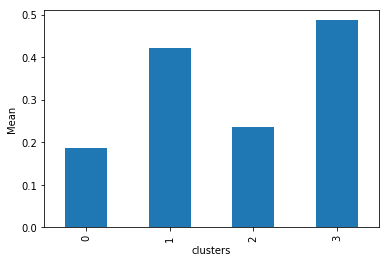

In [21]:
pd.pivot_table(km, index = 'clusters', values = 'completion').plot(kind = 'bar')
plt.ylabel("Mean")

## The above graph shows the average completion rate for each of our generated clusters. Schools in cluster 1 & 3 have the highest completion rates; schools in cluster 0 have the lowest. 

Text(0,0.5,'Mean')

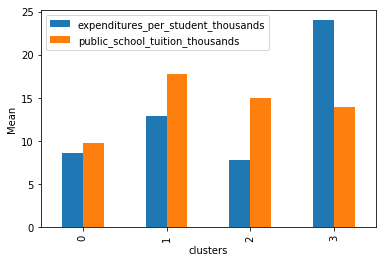

In [22]:
pd.pivot_table(km, index = 'clusters', values = ['public_school_tuition_thousands','expenditures_per_student_thousands']).plot(kind = 'bar')
plt.ylabel("Mean")

The above graph shows the average expentitures and tuition by cluster. Schools in cluster 3 spend the most money per full-time student, schools in cluster 2 spend the least. Schools in cluster 1 have the highest tuition. 

Text(0,0.5,'Mean')

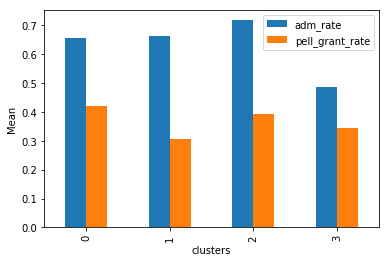

In [23]:
pd.pivot_table(km, index = 'clusters', values = ['adm_rate','pell_grant_rate']).plot(kind = 'bar')
plt.ylabel("Mean")

The above graph shows the average admissions rate and Pell grant rate by cluster. Schools in cluster 2 have the highest admission rates; schools in cluster 3 have the lowest. Schools in cluster 0 and in cluster 1 have similar admission rates. 

Schools in cluster 0 have the highest rate of Pell Grant students, and schools in cluster 1 have the lowest. Schools in cluster 2 and cluster 3 have similar rates of Pell Grant students. 

## Cluster Characteristics

**Cluster 0 Schools: Low completion rate; low expenditures per student; lowest tuition; moderate tuition rate; highest rate of Pell Grant students 

**Cluster 1 Schools: high completion rate; highest tuition; moderate expenditures per student; moderate admission rate; lowest rate of Pell Grant students

**Cluster 2 Schools: low completion rate; lowest expenditures per student; moderate tuition; highest admissions rate; second highest rate of Pell Grant students 

**Cluster 3 Schools: highest completion rate; highest expenditures per student; moderate tuition; lowest admissions rate; moderate rate of Pell Grant students 

All clusters are fairly distinct, but it's worth trying with 5 clusters to see if we can further identify unique groups. 

In [24]:
kmeans2 = KMeans(n_clusters = 5)
kmeans2.fit(km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
print(kmeans2.cluster_centers_)

[[ 2.33302479e-01  1.46687769e+01  7.89672727e+00  7.11816529e-01
   3.98452066e-01  1.97520661e+00]
 [ 4.02063830e-01  1.46395957e+01  1.61883191e+01  6.15153191e-01
   3.25180851e-01  1.34042553e+00]
 [ 4.16947761e-01  1.90842239e+01  1.10839104e+01  6.78691045e-01
   3.02589552e-01  1.13432836e+00]
 [ 1.79464646e-01  9.69066667e+00  8.36506061e+00  6.67174747e-01
   4.26352525e-01 -1.77635684e-15]
 [ 5.86612500e-01  1.51705000e+01  2.87102500e+01  4.17962500e-01
   3.07962500e-01  3.00000000e+00]]


In [26]:
km['clusters2'] = kmeans2.labels_
km.head()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,completion,public_school_tuition_thousands,expenditures_per_student_thousands,adm_rate,pell_grant_rate,clusters,clusters2
0,0.0643,15.567,5.888,0.8738,0.7039,2,0
1,0.3018,16.475,17.055,0.5814,0.3525,1,1
3,0.1533,19.423,10.558,0.7628,0.2949,1,2
4,0.0725,15.037,7.889,0.4590,0.7815,2,0
5,0.4385,21.676,10.478,0.5259,0.1938,1,2


In [27]:
print(pd.pivot_table(km, index = 'clusters2', values = 'completion'))
print(pd.pivot_table(km, index='clusters2', values = 'public_school_tuition_thousands'))
print(pd.pivot_table(km, index='clusters2', values = 'expenditures_per_student_thousands'))
print(pd.pivot_table(km, index='clusters2', values = 'adm_rate'))
print(pd.pivot_table(km, index='clusters2', values = 'pell_grant_rate'))

clusters2
0    0.233302
1    0.402064
2    0.416948
3    0.179465
4    0.586612
Name: completion, dtype: float64
clusters2
0    14.668777
1    14.639596
2    19.084224
3     9.690667
4    15.170500
Name: public_school_tuition_thousands, dtype: float64
clusters2
0     7.896727
1    16.188319
2    11.083910
3     8.365061
4    28.710250
Name: expenditures_per_student_thousands, dtype: float64
clusters2
0    0.711817
1    0.615153
2    0.678691
3    0.667175
4    0.417963
Name: adm_rate, dtype: float64
clusters2
0    0.398452
1    0.325181
2    0.302590
3    0.426353
4    0.307962
Name: pell_grant_rate, dtype: float64


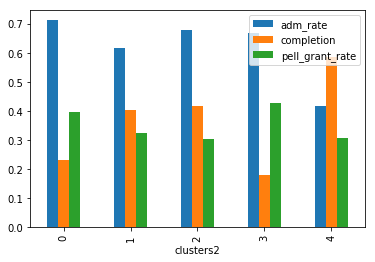

In [30]:
pd.pivot_table(km, index = 'clusters2', values = ['completion','adm_rate','pell_grant_rate']).plot(kind='bar')

## Across 3 of our target variables, schools in cluster 1 and in cluster 2 look very similar. I think we can stick with 4 clusters to show unique grouping. 